# scraping for topic on github

### project outline
- web scraping of https://github.com//topics
- we wil get list of topics. for each topic, we will get topic tittle, topic page url and topic description 
- for each topic ,we will get the repositories in the topic from the topic page including username,repositry_name,url,stars
- we create a csv  file 


# install libraries


In [1]:
!pip install requests 
#get content from internet as a html file


Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install html5lib 
# parse the content  and give it tree like structure
 

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install bs4 
#beautiful soup -for searching the html content

Defaulting to user installation because normal site-packages is not writeable


# import libraries

In [4]:
import requests

In [5]:
from bs4 import BeautifulSoup

## scrape the  list of topics from github

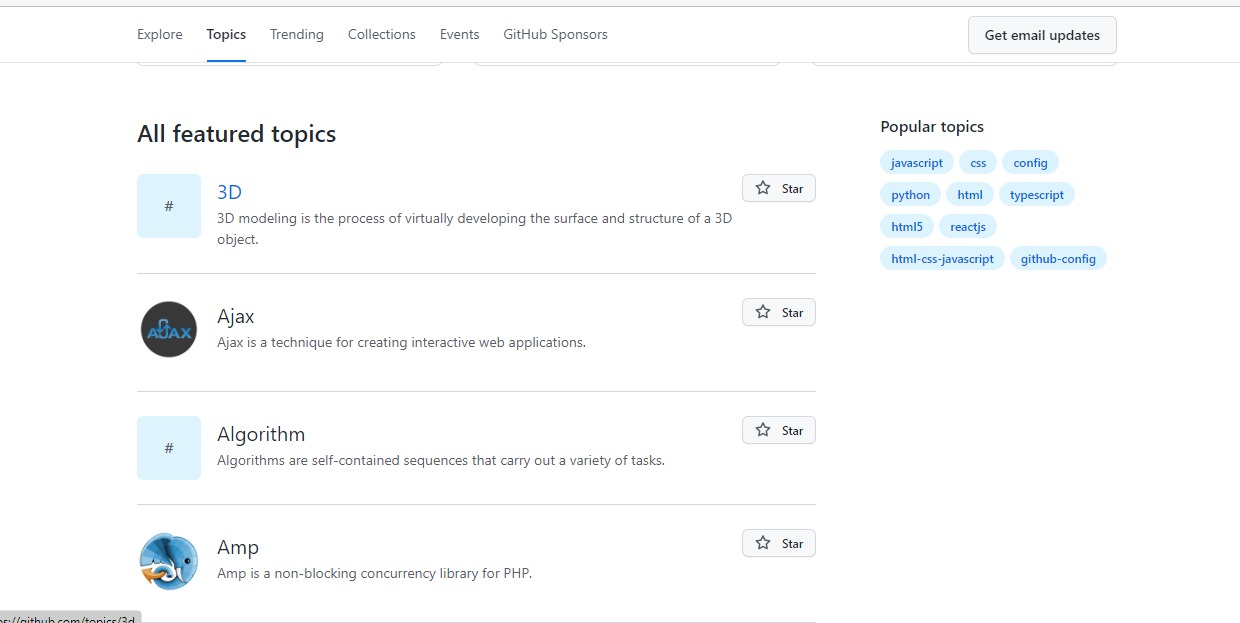

In [6]:
from IPython.display import Image
Image(filename='C:/Users/pooja/Downloads/github.jpeg',width=4000,height=200)

In [7]:
url='https://github.com//topics'

In [8]:
#get the html page
r=requests.get(url)
#check the status of page 200 shows sucessfully download 
r.status_code

200

In [9]:
len(r.text)

144762

In [10]:
#print first 1000 lines
htmlcontent=r.text
htmlcontent[:1000]

'\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark" data-a11y-animated-images="system">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n\n\n  <link crossorigin="anonymous" media="all" integrity="sha512-UXiu4O52iBFkqt6Kx5t+pqHYP2/LWWIw9+l5ia74TWw+xPzpH44BFfAQp7yzCe0XFGZa72Xiqyml6tox1KkUjw==" rel="stylesheet" href="https://github.githubassets.com/assets/light-5178aee0ee76.css" /><link crossorigin="anonymous" media="all" integrity="sha512-IX1PnI5wWBz8Kgb1JI0f2QFa/WuRQQHJHe0vkKinQzsxRlNb4b8NgODX5htSZVAAk

In [11]:
#parse the html
soup=BeautifulSoup(htmlcontent,'html.parser')
print(soup.prettify)

<bound method Tag.prettify of 
<!DOCTYPE html>

<html data-a11y-animated-images="system" data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-5178aee0ee76.css" integrity="sha512-UXiu4O52iBFkqt6Kx5t+pqHYP2/LWWIw9+l5ia74TWw+xPzpH44BFfAQp7yzCe0XFGZa72Xiqyml6tox1KkUjw==" media="all" rel="stylesheet"><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-217d4f9c8e70.css" integrity="sha512-IX1PnI5wWB

In [12]:
p_tags=soup.find_all('p')


In [13]:
len(p_tags)

67

In [14]:
p_tags[:5]

[<p class="f4 color-fg-muted col-md-6 mx-auto">Browse popular topics on GitHub.</p>,
 <p class="f3 lh-condensed text-center Link--primary mb-0 mt-1">
         GraphQL
       </p>,
 <p class="f5 color-fg-muted text-center mb-0 mt-1">GraphQL is a query language for APIs and a runtime for fulfilling those queries with your existing data.</p>,
 <p class="f3 lh-condensed text-center Link--primary mb-0 mt-1">
         Python
       </p>,
 <p class="f5 color-fg-muted text-center mb-0 mt-1">Python is a dynamically typed programming language.</p>]

In [15]:
#find all topics name from the p tags 

In [16]:

topics_title_tags=soup.find_all('p',{'class':'f3 lh-condensed mb-0 mt-1 Link--primary'})
len(topics_title_tags)

30

In [17]:
topics_title_tags[:3]

[<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ajax</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Algorithm</p>]

In [18]:
#find description of topic 
topic_desription_tags=soup.find_all('p',{'class':'f5 color-fg-muted mb-0 mt-1'})

In [19]:
len(topic_desription_tags)

30

In [20]:
topic_desription_tags[:4]

[<p class="f5 color-fg-muted mb-0 mt-1">
           3D modeling is the process of virtually developing the surface and structure of a 3D object.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Ajax is a technique for creating interactive web applications.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Algorithms are self-contained sequences that carry out a variety of tasks.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Amp is a non-blocking concurrency library for PHP.
         </p>]

In [21]:
#find url of a topic 
topic_url=soup.find_all('a',{'class':'no-underline flex-grow-0'})

In [22]:
len(topic_url)

30

In [23]:
topic_url[0]["href"]

'/topics/3d'

In [24]:
topic_url0="https://github.com"+topic_url[0]["href"]

In [25]:
#make url of topic 
print(topic_url0)

https://github.com/topics/3d


In [26]:
# make a list of topics
topic_tittle=[]
for tags in topics_title_tags:
    topic_tittle.append(tags.text)
print(topic_tittle)

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android', 'Angular', 'Ansible', 'API', 'Arduino', 'ASP.NET', 'Atom', 'Awesome Lists', 'Amazon Web Services', 'Azure', 'Babel', 'Bash', 'Bitcoin', 'Bootstrap', 'Bot', 'C', 'Chrome', 'Chrome extension', 'Command line interface', 'Clojure', 'Code quality', 'Code review', 'Compiler', 'Continuous integration', 'COVID-19', 'C++']


In [27]:
#make a list of description
topic_description=[]
for des in topic_desription_tags:
    topic_description.append(des.text.strip())
topic_description

['3D modeling is the process of virtually developing the surface and structure of a 3D object.',
 'Ajax is a technique for creating interactive web applications.',
 'Algorithms are self-contained sequences that carry out a variety of tasks.',
 'Amp is a non-blocking concurrency library for PHP.',
 'Android is an operating system built by Google designed for mobile devices.',
 'Angular is an open source web application platform.',
 'Ansible is a simple and powerful automation engine.',
 'An API (Application Programming Interface) is a collection of protocols and subroutines for building software.',
 'Arduino is an open source hardware and software company and maker community.',
 'ASP.NET is a web framework for building modern web apps and services.',
 'Atom is a open source text editor built with web technologies.',
 'An awesome list is a list of awesome things curated by the community.',
 'Amazon Web Services provides on-demand cloud computing platforms on a subscription basis.',
 'Azu

In [28]:
#make list of topic urls
urls=[]
for i in topic_url:
    urls.append("https://gitthub.com"+i["href"])
urls

['https://gitthub.com/topics/3d',
 'https://gitthub.com/topics/ajax',
 'https://gitthub.com/topics/algorithm',
 'https://gitthub.com/topics/amphp',
 'https://gitthub.com/topics/android',
 'https://gitthub.com/topics/angular',
 'https://gitthub.com/topics/ansible',
 'https://gitthub.com/topics/api',
 'https://gitthub.com/topics/arduino',
 'https://gitthub.com/topics/aspnet',
 'https://gitthub.com/topics/atom',
 'https://gitthub.com/topics/awesome',
 'https://gitthub.com/topics/aws',
 'https://gitthub.com/topics/azure',
 'https://gitthub.com/topics/babel',
 'https://gitthub.com/topics/bash',
 'https://gitthub.com/topics/bitcoin',
 'https://gitthub.com/topics/bootstrap',
 'https://gitthub.com/topics/bot',
 'https://gitthub.com/topics/c',
 'https://gitthub.com/topics/chrome',
 'https://gitthub.com/topics/chrome-extension',
 'https://gitthub.com/topics/cli',
 'https://gitthub.com/topics/clojure',
 'https://gitthub.com/topics/code-quality',
 'https://gitthub.com/topics/code-review',
 'https:

In [29]:
import pandas as pd

In [30]:
topics_dict={'topic_name':topic_tittle,
            'topic_description':topic_description,
            'topic_url':urls}

In [31]:
#create dataframe
df=pd.DataFrame(topics_dict)
df[:3]

,topic_name,topic_description,topic_url
0,3D,3D modeling is the process of virtually develo...,https://gitthub.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://gitthub.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://gitthub.com/topics/algorithm


# creating csv from extracted information

In [32]:
df.to_csv('github.csv',index=None)

In [33]:
df1=pd.read_csv('github.csv')

In [34]:
df1

,topic_name,topic_description,topic_url
0,3D,3D modeling is the process of virtually develo...,https://gitthub.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://gitthub.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://gitthub.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://gitthub.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://gitthub.com/topics/android
5,Angular,Angular is an open source web application plat...,https://gitthub.com/topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://gitthub.com/topics/ansible
7,API,An API (Application Programming Interface) is ...,https://gitthub.com/topics/api
8,Arduino,Arduino is an open source hardware and softwar...,https://gitthub.com/topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://gitthub.com/topics/aspnet


# getting information out of a topic page

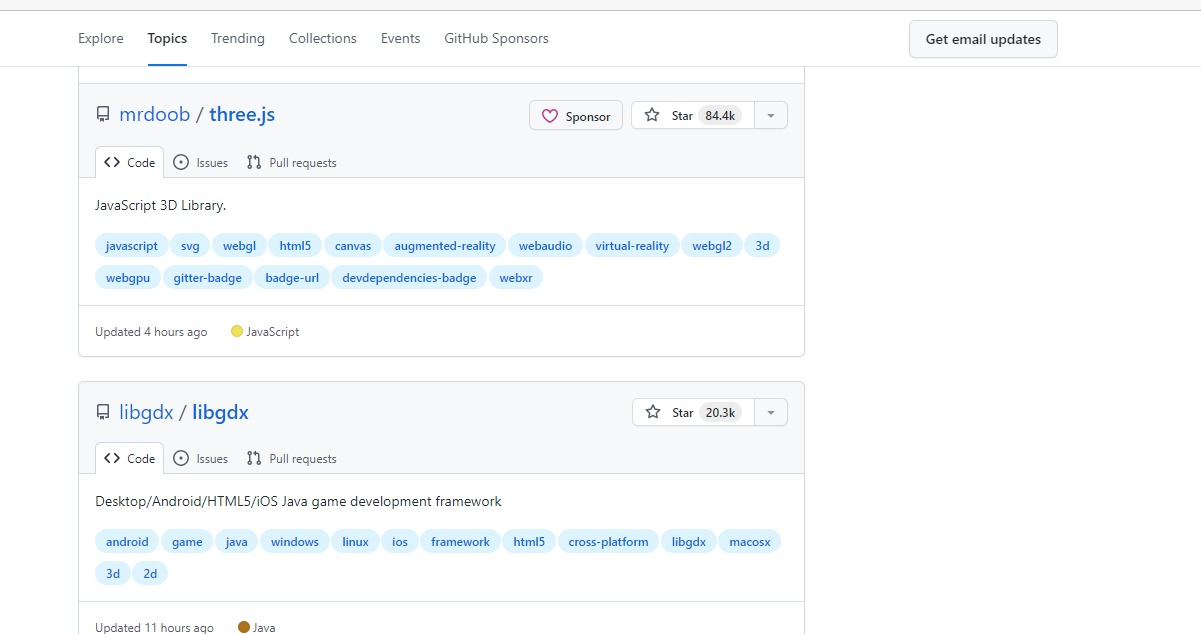

In [85]:
from IPython.display import Image
Image(filename='C:/Users/pooja/Downloads/github1.jpeg',width=4000,height=500)

In [36]:
url='https://github.com/topics/3d'

In [37]:
response = requests.get(url)

In [38]:
response.status_code

200

In [39]:
len(response.text)

462140

In [40]:
topic_doc=BeautifulSoup(response.text,'html.parser')

In [41]:
topic_doc.prettify

<bound method Tag.prettify of 
<!DOCTYPE html>

<html data-a11y-animated-images="system" data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-5178aee0ee76.css" integrity="sha512-UXiu4O52iBFkqt6Kx5t+pqHYP2/LWWIw9+l5ia74TWw+xPzpH44BFfAQp7yzCe0XFGZa72Xiqyml6tox1KkUjw==" media="all" rel="stylesheet"><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-217d4f9c8e70.css" integrity="sha512-IX1PnI5wWB

In [42]:

a='f3 color-fg-muted text-normal lh-condensed'
rep_tags=topic_doc.find_all('h3',{'class':a})

In [43]:
len(rep_tags)

20

In [44]:
rep_tags[0]

<h3 class="f3 color-fg-muted text-normal lh-condensed">
<a data-ga-click="Explore, go to repository owner, location:explore feed" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"OWNER","click_visual_representation":"REPOSITORY_OWNER_HEADING","actor_id":null,"record_id":97088,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="4bdbc49d3c05ae7f70b531fbce709a384200b0768554e0172950286a8db30940" data-turbo="false" data-view-component="true" href="/mrdoob">
            mrdoob
</a>          /
          <a class="text-bold wb-break-word" data-ga-click="Explore, go to repository, location:explore feed" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":576201,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac

In [45]:
#find user name 
USER_NAME=rep_tags[0].find_all('a')

In [46]:
USER_NAME[0].text.strip()

'mrdoob'

In [47]:
# show repositry name of each username
USER_NAME[1].text.strip()

'three.js'

In [48]:
github_url='https://github.com'
repo_url=github_url+USER_NAME[1]['href']

In [49]:
#make url for each repositry of username
repo_url

'https://github.com/mrdoob/three.js'

In [50]:
star_tags=topic_doc.find_all('span',{'class':'Counter js-social-count'})
len(star_tags)

20

In [51]:
#find stars of each repositry 
star_tags[0].text

'84.4k'

In [52]:
def star_count(star_str):
    star_str=star_str.strip()
    if star_str[-1]=='k':
        return int(float(star_str[:-1])*1000)
    return int(star_str)

In [53]:
star_count(star_tags[0].text.strip())

84400

In [77]:
#make function for username ,repositry, url, stars
def get_repo(h1_tag,star_tag):
    a_tags=h1_tag.find_all('a')
    user_names=a_tags[0].text.strip()
    repo_names=a_tags[1].text.strip()
    repo_url=github_url+a_tags[1]['href']
    stars=star_count(star_tag.text.strip())
    return user_names,repo_names,repo_url,stars

In [78]:
get_repo(rep_tags[0],star_tags[0])

('mrdoob', 'three.js', 'https://github.com/mrdoob/three.js', 84400)

In [79]:
topic_repo_dict={
    'username':[],
    'repo_name':[],
    'repo_url':[],
    'stars':[]
}
for i in range(len(rep_tags)):
    rep=get_repo(rep_tags[i],star_tags[i])
    topic_repo_dict['username'].append(rep[0])
    topic_repo_dict['repo_name'].append(rep[1])
    topic_repo_dict['repo_url'].append(rep[2])
    topic_repo_dict['stars'].append(rep[3])

In [80]:
len(rep_tags)

20

In [81]:
topic_repo_dict

{'username': ['mrdoob',
  'libgdx',
  'pmndrs',
  'BabylonJS',
  'aframevr',
  'ssloy',
  'lettier',
  'FreeCAD',
  'metafizzy',
  'CesiumGS',
  'timzhang642',
  'isl-org',
  'a1studmuffin',
  'blender',
  'domlysz',
  'spritejs',
  'openscad',
  'tensorspace-team',
  'jagenjo',
  'YadiraF'],
 'repo_name': ['three.js',
  'libgdx',
  'react-three-fiber',
  'Babylon.js',
  'aframe',
  'tinyrenderer',
  '3d-game-shaders-for-beginners',
  'FreeCAD',
  'zdog',
  'cesium',
  '3D-Machine-Learning',
  'Open3D',
  'SpaceshipGenerator',
  'blender',
  'BlenderGIS',
  'spritejs',
  'openscad',
  'tensorspace',
  'webglstudio.js',
  'PRNet'],
 'repo_url': ['https://github.com/mrdoob/three.js',
  'https://github.com/libgdx/libgdx',
  'https://github.com/pmndrs/react-three-fiber',
  'https://github.com/BabylonJS/Babylon.js',
  'https://github.com/aframevr/aframe',
  'https://github.com/ssloy/tinyrenderer',
  'https://github.com/lettier/3d-game-shaders-for-beginners',
  'https://github.com/FreeCAD/Fr

In [82]:
import pandas as pd
df=pd.DataFrame(topic_repo_dict)

In [83]:
df

,username,repo_name,repo_url,stars
0,mrdoob,three.js,https://github.com/mrdoob/three.js,84400
1,libgdx,libgdx,https://github.com/libgdx/libgdx,20300
2,pmndrs,react-three-fiber,https://github.com/pmndrs/react-three-fiber,19100
3,BabylonJS,Babylon.js,https://github.com/BabylonJS/Babylon.js,18100
4,aframevr,aframe,https://github.com/aframevr/aframe,14400
5,ssloy,tinyrenderer,https://github.com/ssloy/tinyrenderer,14400
6,lettier,3d-game-shaders-for-beginners,https://github.com/lettier/3d-game-shaders-for...,13500
7,FreeCAD,FreeCAD,https://github.com/FreeCAD/FreeCAD,11900
8,metafizzy,zdog,https://github.com/metafizzy/zdog,9300
9,CesiumGS,cesium,https://github.com/CesiumGS/cesium,9100
